# 과제1: tensorflow를 이용한 NN 밑바닥부터 구현
input feature가 100개이고,  
hidden layer가 2개이고 neuron이 각각 50,10개이고,  
output이 5개인 NN를 구현해 보자  
* hidden layer는 relu를 activation function으로, output layer는 softmax를 activation function으로 사용

In [93]:
import tensorflow as tf
import numpy as np

In [94]:
n_x = 100
n_h1 = 50
n_h2 = 10
n_y = 5

In [95]:
# Simulate train set
m = 500

x_train=np.random.randn(m,n_x).astype(np.float32)
y_train=np.zeros((m,n_y)).astype(np.float32)
y_train[np.arange(m),np.random.randint(n_y,size=m)]=1

print(x_train)
print(y_train)

[[ 0.03912632 -0.7355045  -0.84798056 ... -0.9025617  -0.7398186
   0.70155734]
 [-1.3184167  -1.9242322  -1.2288812  ... -1.5765887   0.04384983
   0.39832184]
 [-1.4750484   1.1369978  -0.58545715 ...  0.76895034 -0.707602
  -0.36641392]
 ...
 [-1.4163789   0.0739677   1.1331342  ...  0.24395539  0.6343379
   1.2382886 ]
 [-0.07312146 -2.0007443   1.9053216  ...  0.04207258  0.32269374
   2.1011698 ]
 [-0.7164306  -0.7950649  -1.7665174  ... -0.19597398  0.15862733
   0.16763465]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


* Initialization of weights

In [96]:
w1=tf.Variable(1e-3*np.random.randn(n_x,n_h1).astype(np.float32),name="w1")
## 코드를 작성해 보세요 ##
w2=tf.Variable(1e-3*np.random.randn(n_h1,n_h2).astype(np.float32),name="w2")
w3=tf.Variable(1e-3*np.random.randn(n_h2,n_y).astype(np.float32),name="w3")

* forward propagation을 통해 prediction 값을 구하고, loss를 구하는 function을 만들어 봅시다

In [97]:
def forward(x):
    z1=tf.matmul(x,w1)
    a1=tf.nn.relu(z1)
    ## 코드를 작성해 보세요 ##
    z2=tf.matmul(a1,w2)
    a2=tf.nn.relu(z2)
    z3=tf.matmul(a2,w3)
    predictions = tf.nn.softmax(z3)
    
    return predictions

def loss_fn(predictions, y):
    loss= -tf.reduce_sum(y*tf.math.log(predictions))
    return loss

* backpropagation & update parameters

In [98]:
learning_rate=1e-2
optimizer=tf.keras.optimizers.Adam(learning_rate)

def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = forward(x)
        loss = loss_fn(predictions, y)
    ## 코드를 작성해 보세요 ## (hint: tape.gradient를 구글링 해보세요.
    gradient = tape.gradient(loss, [w1, w2])
    # optimizer와 위에서 구한 경사도를 이용해 가중치들을 업데이트 합니다.
    optimizer.apply_gradients(zip(gradient, [w1, w2]))
    return loss, w1, w2


* 간단하게 train loop를 작성해 loss가 줄어나가는지 확인해 봅시다.

In [99]:
loss_list = []

for step in range(10):
  loss, w1, w2 = train_step(x_train, y_train)
  loss_list.append(loss.numpy())
    
print(loss_list)

[804.71875, 804.7174, 804.70044, 804.6661, 804.6096, 804.5277, 804.41693, 804.2749, 804.09937, 803.8884]


# 과제2: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

In [121]:
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [124]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [125]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

##### 아래 주어진 코드에서 에러가 나는데 해결을 못하겠습니다ㅠ 제가 과제로 코드 적는 부분은 모두 해결했습니다!

TypeError: ignored

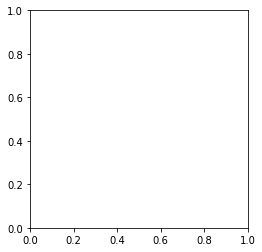

In [126]:
plt.imshow(x_train[0]).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [128]:
y_train.shape

(60000,)

In [129]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [130]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [145]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(256, input_dim=784, activation="relu"))
model.add(tf.keras.layers.Dense(84, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics= ["accuracy"])

내가 만든 모델을 확인해 봅시다.

In [146]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_25 (Dense)             (None, 84)                21588     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                850       
Total params: 223,398
Trainable params: 223,398
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [147]:
model.fit(x_train,y_train,epochs=20,verbose=0)

95%이상의 성능을 가진 모델을 만들면 완성!

In [148]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 0s - loss: 0.1190 - accuracy: 0.9782

Accuracy: 0.9782000184059143


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)